In [480]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [482]:
df = pd.read_csv('dia.csv')
 

In [484]:
print(df.head())
 

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [486]:
num_negative_prices = (df['price'] < 0).sum()
print("Number of negative prices:", num_negative_prices)
 

Number of negative prices: 1


In [488]:
df = df[df['price'] >= 0]
num_negative_prices = (df['price'] < 0).sum()
print("Number of negative prices:", num_negative_prices)

Number of negative prices: 0


In [490]:
print(df.isnull().sum())
 

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [492]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0'])
print(df.isnull().sum())
 


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [494]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 153


In [496]:
df = df.drop_duplicates()
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


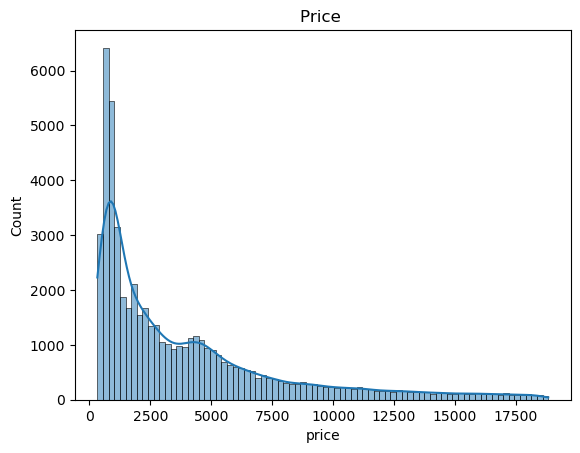

In [498]:
sns.histplot(df['price'], kde=True)
plt.title("Price ")
plt.show()


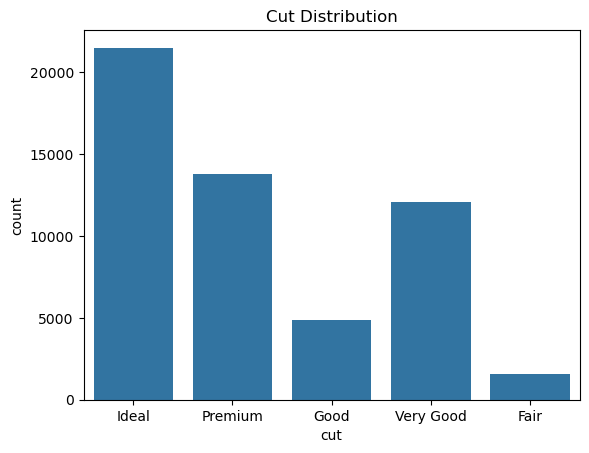

In [502]:
df['cut'] = df['cut'].str.strip().str.title()
sns.countplot(x='cut', data=df)
plt.title("Cut Distribution")
plt.show()

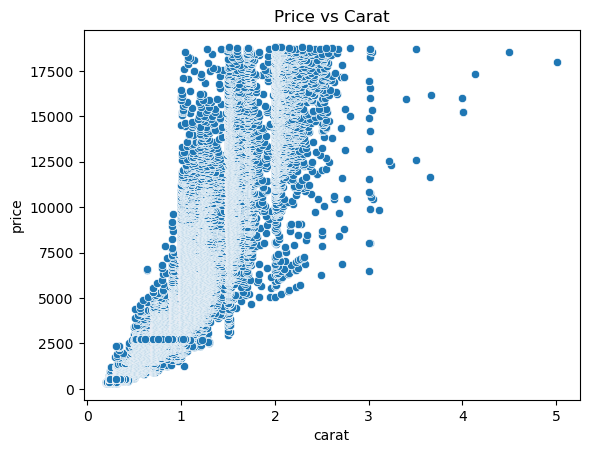

In [504]:
sns.scatterplot(x='carat', y='price', data=df)
plt.title("Price vs Carat")
plt.show()


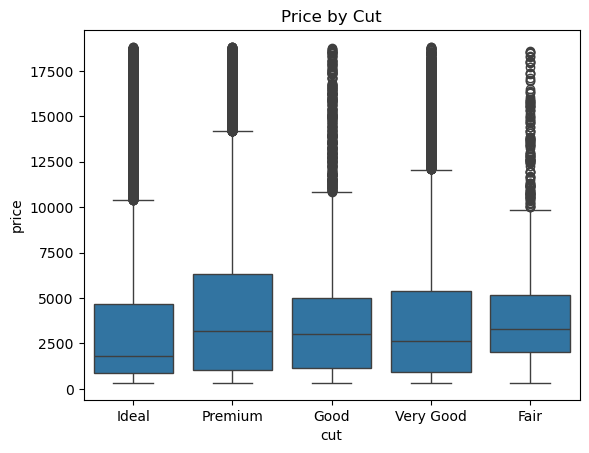

In [506]:
sns.boxplot(x='cut', y='price', data=df)
plt.title("Price by Cut")
plt.show()
#observed that the premium cut starts from a high range it has the highest range 
#fair starts from a low number less than 10k


In [508]:
 import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

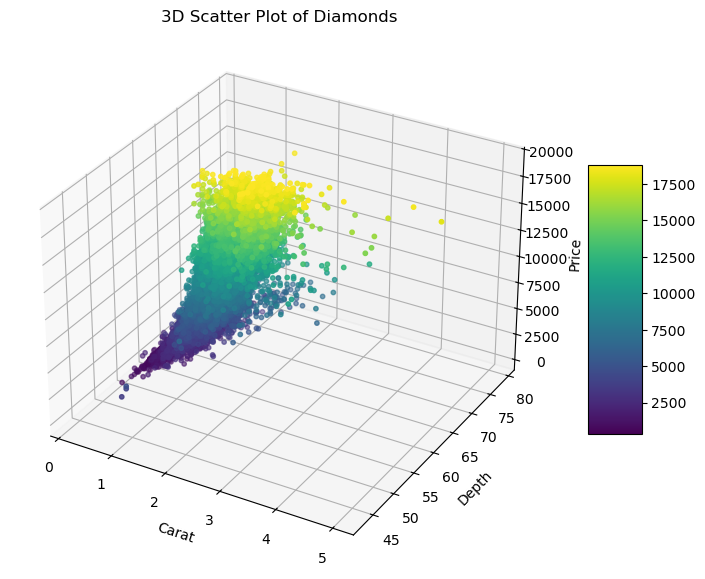

In [510]:
x = df['carat']
y = df['depth']
z = df['price'] 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=10) 
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Diamonds') 
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5) 
plt.show()
#high prices has light colors 
#low pices have dark colors

In [513]:
 from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])

# See the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

print(df)
# we use label encoding to label non numerical labels that can be ordered

Label mapping: {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
       carat  cut color clarity  depth  table  price     x     y     z
0       0.23    2     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72    2     D     SI1   60.8   57.0   2757  5.75  5.76   3.5
53936   0.72    1     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2     D     SI2   62.2   55.0   2757  5.83  5.87    3.

[53788 rows x 10 columns]


In [515]:
df= pd.get_dummies(df, columns=['clarity', 'color'], prefix=['clarity', 'color'], dtype=int)

df
# we use it with non numerical labels that can not be ordered

,carat,cut,depth,table,price,x,y,z,clarity_7y,clarity_8,...,clarity_VVS2,clarity_vs2,color_87,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,60.8,57.0,2757,5.75,5.76,3.5,0,0,...,0,0,0,1,0,0,0,0,0,0
53936,0.72,1,63.1,55.0,2757,5.69,5.75,3.61,0,0,...,0,0,0,1,0,0,0,0,0,0
53937,0.70,4,62.8,60.0,2757,5.66,5.68,3.56,0,0,...,0,0,0,1,0,0,0,0,0,0
53938,0.86,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,0,0,1,0,0


In [517]:
print(df.columns.tolist())

['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_7y', 'clarity_8', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'clarity_vs2', 'color_87', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']


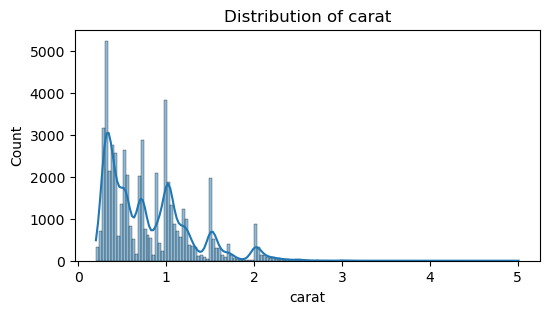

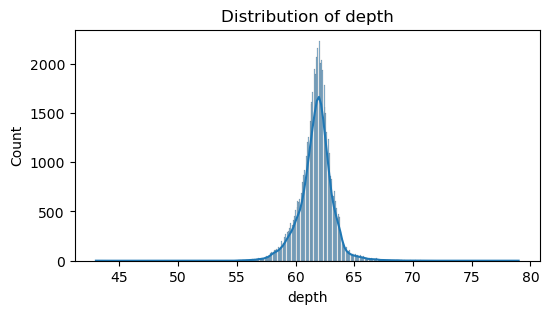

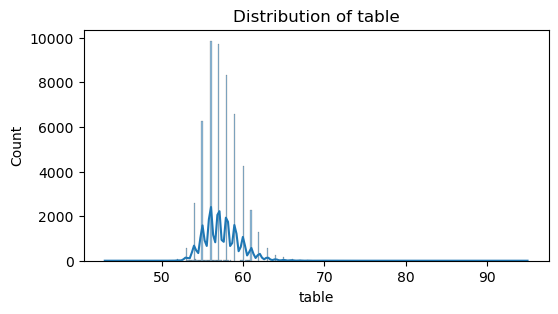

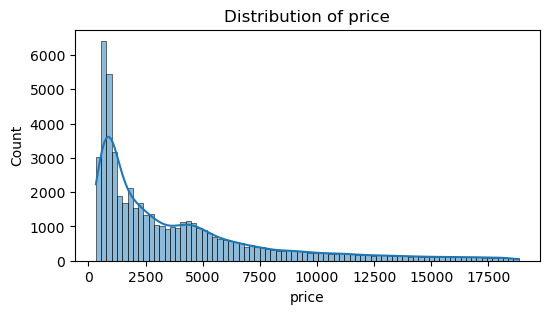

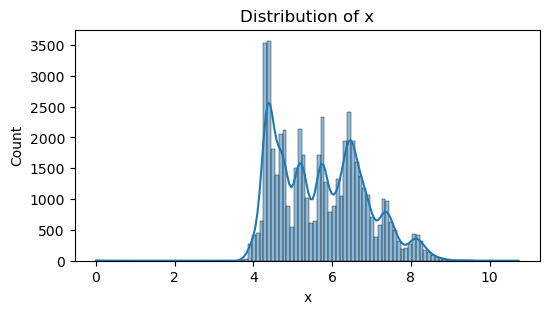

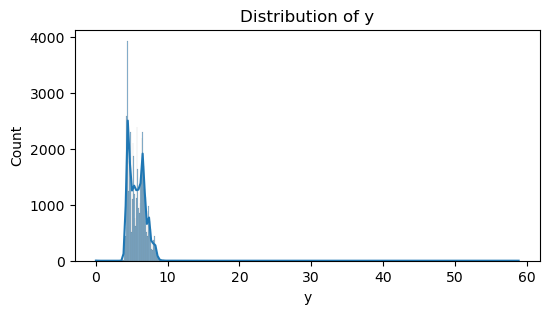

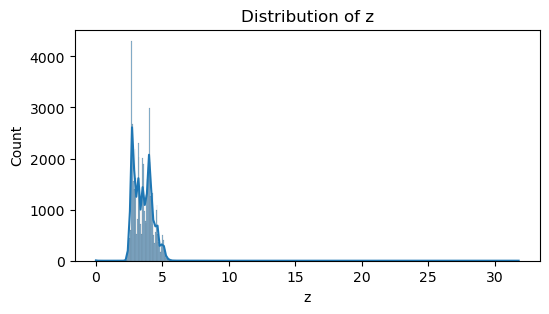

In [519]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')  # Will convert invalid values to NaN

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
 

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [520]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled
#We scale data to ensure that all features contribute equally to the model and to improve model performance and training stability.
# we do not need to use it with tree-based models

,carat,cut,depth,table,price,x,y,z,clarity_7y,clarity_8,...,clarity_VVS2,clarity_vs2,color_87,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.199363,2,-0.173469,-1.100478,-0.904444,-1.589319,-1.537477,-1.572452,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.241610,3,-1.362457,1.585665,-0.904444,-1.642855,-1.660149,-1.742647,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.199363,1,-3.390731,3.376428,-0.904193,-1.500093,-1.458617,-1.742647,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.072623,3,0.455995,0.242593,-0.902438,-1.366253,-1.318421,-1.288795,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.030376,1,1.085460,0.242593,-0.902187,-1.241336,-1.213274,-1.118601,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164319,2,-0.663052,-0.205097,-0.294908,0.016757,0.022204,-0.054887,0,0,...,0,0,0,1,0,0,0,0,0,0
53936,-0.164319,1,0.945579,-1.100478,-0.294908,-0.036779,0.013442,0.101125,0,0,...,0,0,0,1,0,0,0,0,0,0
53937,-0.206566,4,0.735757,1.137975,-0.294908,-0.063547,-0.047894,0.030210,0,0,...,0,0,0,1,0,0,0,0,0,0
53938,0.131408,3,-0.523171,0.242593,-0.294908,0.373663,0.337645,0.285502,0,0,...,0,0,0,0,0,0,0,1,0,0
